In [1]:
import numpy as np
import pandas as pd

In [2]:
dftrain_raw = pd.read_csv('../../dataset/titanic/train.csv')
dftest_raw = pd.read_csv('../../dataset/titanic/test.csv')
dftrain_raw.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


数据探索

label分布情况

Text(0.5, 0, 'survived')

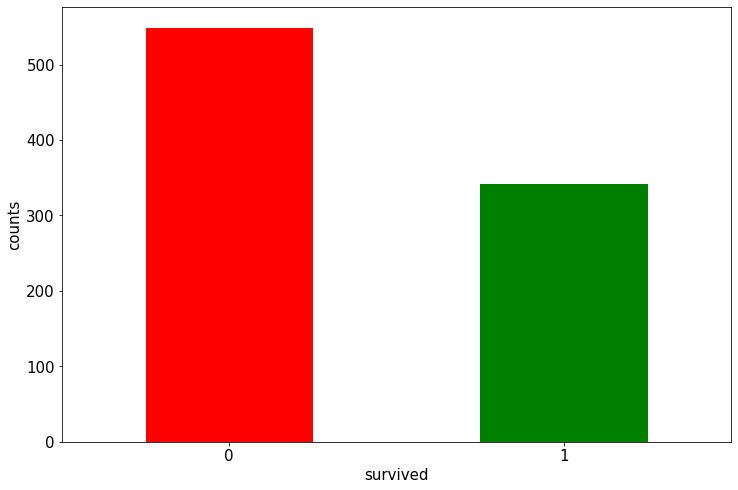

In [6]:
%matplotlib inline
%config InlineBackend.figure_format='png'
ax = dftrain_raw['Survived'].value_counts().plot(kind='bar',figsize=(12,8),fontsize=15,rot=0,color = ['r','g'])
ax.set_ylabel('counts',fontsize=15)
ax.set_xlabel('survived',fontsize=15)

年龄分布情况

Text(0.5, 0, 'Age')

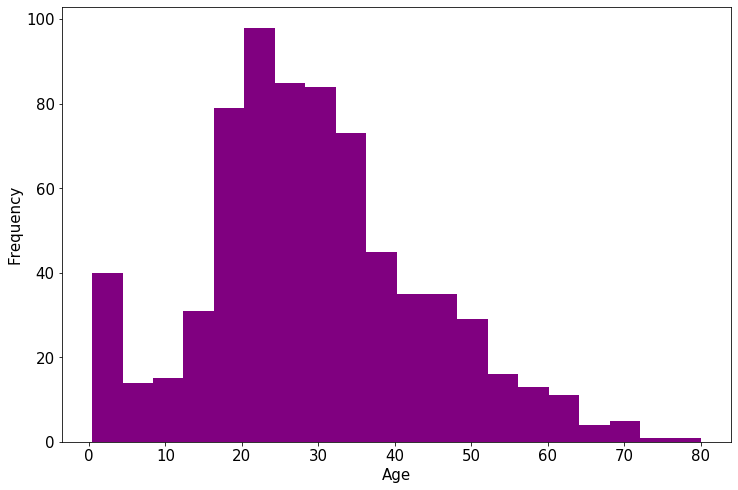

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
ax = dftrain_raw['Age'].plot(kind='hist', bins=20, color='purple',
                             figsize=(12, 8), fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
ax.set_xlabel('Age', fontsize=15)

年龄和label的相关性

Text(0.5, 0, 'Age')

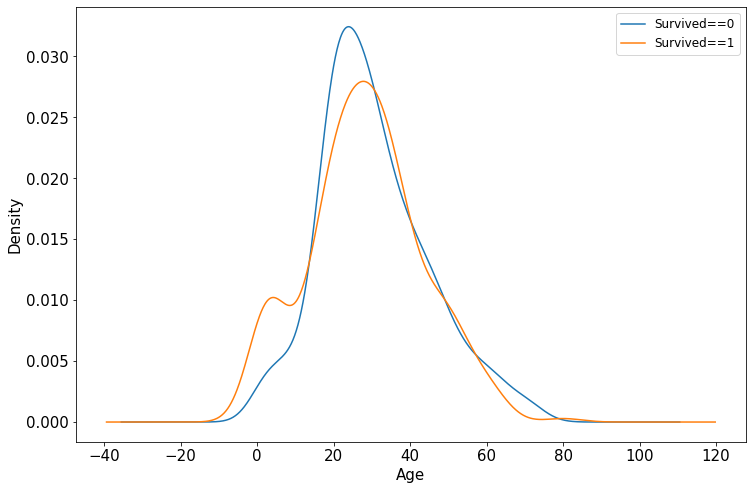

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
ax = dftrain_raw.query('Survived == 0')['Age'].plot(kind='density',figsize=(12, 8), fontsize=15)
dftrain_raw.query('Survived == 1')['Age'].plot(kind='density',figsize=(12, 8), fontsize=15)
ax.legend(['Survived==0', 'Survived==1'], fontsize=12)
ax.set_ylabel('Density', fontsize=15)
ax.set_xlabel('Age', fontsize=15)

数据预处理

In [7]:
# 数据预处理
def preprocessing(dfdata):

    dfresult = pd.DataFrame()

    # Pclass
    dfPclass = pd.get_dummies(dfdata['Pclass'])
    dfPclass.columns = ['Pclass_' + str(x) for x in dfPclass.columns]
    dfresult = pd.concat([dfresult, dfPclass], axis=1)

    # Sex
    dfSex = pd.get_dummies(dfdata['Sex'])
    dfresult = pd.concat([dfresult, dfSex], axis=1)

    # Age
    dfresult['Age'] = dfdata['Age'].fillna(0)
    dfresult['Age_null'] = pd.isna(dfdata['Age']).astype('int32')

    # SibSp,Parch,Fare
    dfresult['SibSp'] = dfdata['SibSp']
    dfresult['Parch'] = dfdata['Parch']
    dfresult['Fare'] = dfdata['Fare']

    # Carbin
    dfresult['Cabin_null'] = pd.isna(dfdata['Cabin']).astype('int32')

    # Embarked
    dfEmbarked = pd.get_dummies(dfdata['Embarked'], dummy_na=True)
    dfEmbarked.columns = ['Embarked_' + str(x) for x in dfEmbarked.columns]
    dfresult = pd.concat([dfresult, dfEmbarked], axis=1)

    return(dfresult)


x_train = preprocessing(dftrain_raw)
y_train = dftrain_raw['Survived'].values

x_test = preprocessing(dftest_raw)

构建模型

In [8]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(15,)))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# 二分类问题选择二元交叉熵损失函数
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                320       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 761
Trainable params: 761
Non-trainable params: 0
_________________________________________________________________


训练模型

In [9]:
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=150,
                    validation_split=0.2
                    )

Train on 712 samples, validate on 179 samples
Epoch 1/150
712/712 [==============================] - 1s 2ms/step - loss: 1.6543 - acc: 0.6096 - val_loss: 1.1069 - val_acc: 0.6257
Epoch 2/150
712/712 [==============================] - 0s 49us/step - loss: 0.8928 - acc: 0.5463 - val_loss: 0.6075 - val_acc: 0.6257
Epoch 3/150
712/712 [==============================] - 0s 49us/step - loss: 0.6455 - acc: 0.5857 - val_loss: 0.5736 - val_acc: 0.6425
Epoch 4/150
712/712 [==============================] - 0s 50us/step - loss: 0.6386 - acc: 0.6053 - val_loss: 0.5720 - val_acc: 0.6425
Epoch 5/150
712/712 [==============================] - 0s 49us/step - loss: 0.6379 - acc: 0.6053 - val_loss: 0.5790 - val_acc: 0.6592
Epoch 6/150
712/712 [==============================] - 0s 49us/step - loss: 0.6362 - acc: 0.6180 - val_loss: 0.5767 - val_acc: 0.6927
Epoch 7/150
712/712 [==============================] - 0s 49us/step - loss: 0.6306 - acc: 0.6559 - val_loss: 0.5663 - val_acc: 0.6872
Epoch 8/150
712/7

评估模型

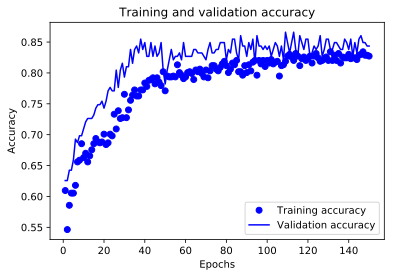

In [10]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

保存模型

In [11]:
# 保存模型结构
json_str = model.to_json()
yaml_str = model.to_yaml()

#保存模型权重
model.save_weights('../model/model_weights.h5')

# 恢复模型结构
model_json = models.model_from_json(json_str)
model_json.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])
# 加载权重
model_json.load_weights('model_weights.h5')

model_json.evaluate(x_train,y_train)

891/891 [==============================] - 0s 60us/step


[0.38244236662866826, 0.8282828291524807]